Universidad Internacional de La Rioja (UNIR) - Máster Universitario en Inteligencia Artificial - Visión artificial


Datos del alumno (Nombre y Apellidos): Cristhian David Cuero Martínez

Fecha: 12/19/2024
***

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure, img_as_float
from skimage.io import imread, imshow
from skimage.filters import gaussian, sobel, unsharp_mask
from skimage.exposure import equalize_hist, adjust_log, adjust_gamma
from skimage.color import rgb2gray
import cv2


<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Imagen 1.</span>




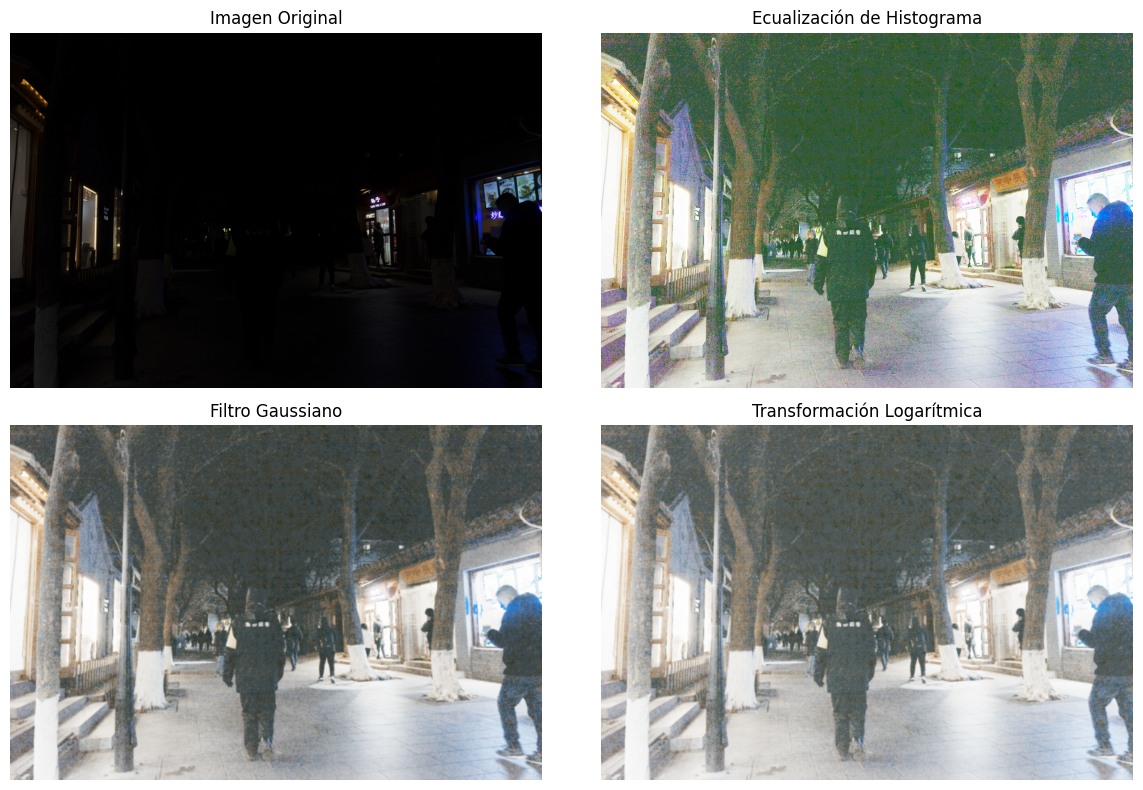

In [105]:
# Cargar la imagen
image = img_as_float(imread("129.png"))

# Función para ecualizar cada canal de color
def equalize_rgb(image):
    channels = []
    for channel in range(image.shape[2]):
        eq_channel = exposure.equalize_hist(image[..., channel])
        channels.append(eq_channel)
    return np.stack(channels, axis=-1)

# 1. Ajuste de contraste mediante ecualización de histograma por canal
image_eq = equalize_rgb(image)

# 2. Aplicar un filtro Gaussiano para suavizar la imagen
image_gaussian = gaussian(image_eq, sigma=1)

# 3. Aplicar una transformación logarítmica para mejorar detalles en sombras
image_log = exposure.adjust_log(image_gaussian, gain=1)

# Mostrar resultados
plt.figure(figsize=(12, 8))

# Imagen original
plt.subplot(2, 2, 1)
plt.title("Imagen Original")
plt.imshow(image)
plt.axis("off")

# Imagen con ecualización de histograma
plt.subplot(2, 2, 2)
plt.title("Ecualización de Histograma")
plt.imshow(image_eq)
plt.axis("off")

# Imagen con filtro Gaussiano
plt.subplot(2, 2, 3)
plt.title("Filtro Gaussiano")
plt.imshow(image_gaussian)
plt.axis("off")

# Imagen con transformación logarítmica
plt.subplot(2, 2, 4)
plt.title("Transformación Logarítmica")
plt.imshow(image_log)
plt.axis("off")

plt.tight_layout()
plt.show()


<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Imagen 2.</span>




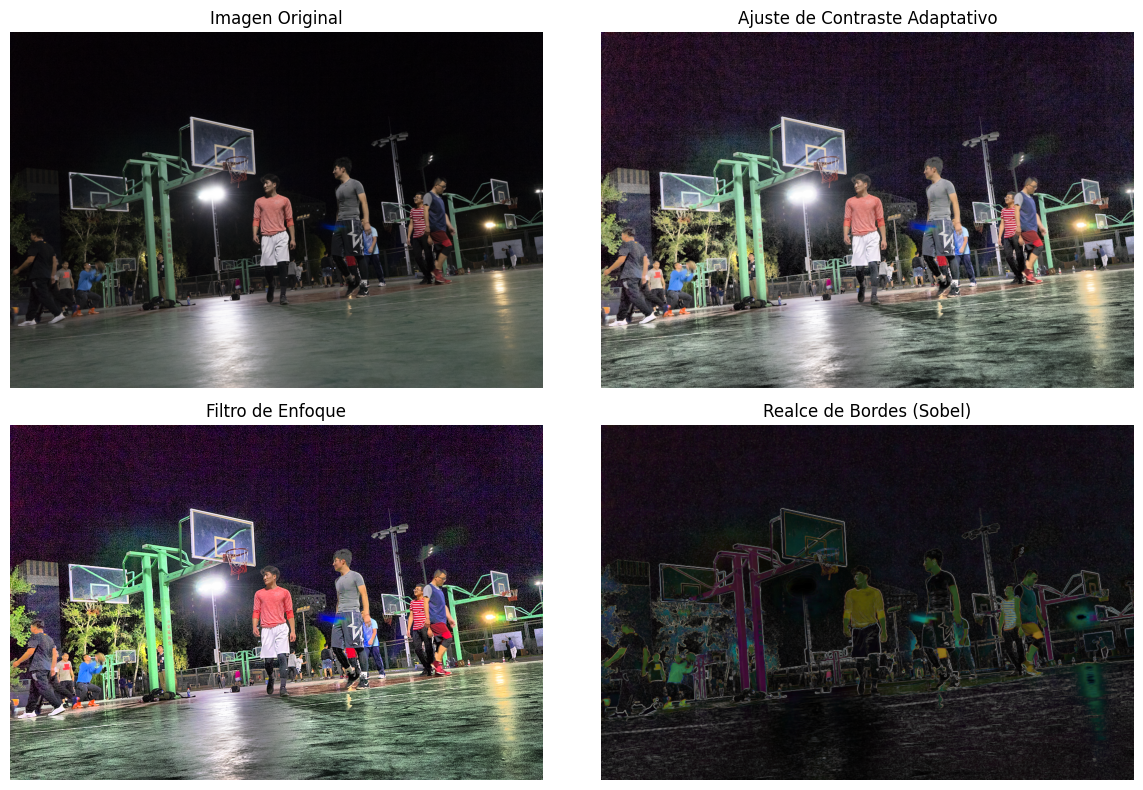

In [106]:
# Cargar la imagen
image = img_as_float(imread("1836.png"))

# 1. Ajuste de contraste adaptativo
image_adapteq = exposure.equalize_adapthist(image, clip_limit=0.03)

# 2. Aplicar un filtro de enfoque para mejorar detalles
image_sharpen = unsharp_mask(image_adapteq, radius=1, amount=1)

# 3. Realce de bordes usando el filtro Sobel
image_sobel = sobel(image_sharpen)

# Mostrar resultados
plt.figure(figsize=(12, 8))

# Imagen original
plt.subplot(2, 2, 1)
plt.title("Imagen Original")
plt.imshow(image)
plt.axis("off")

# Imagen con ajuste de contraste adaptativo
plt.subplot(2, 2, 2)
plt.title("Ajuste de Contraste Adaptativo")
plt.imshow(image_adapteq)
plt.axis("off")

# Imagen con filtro de enfoque
plt.subplot(2, 2, 3)
plt.title("Filtro de Enfoque")
plt.imshow(image_sharpen)
plt.axis("off")

# Imagen con realce de bordes
plt.subplot(2, 2, 4)
plt.title("Realce de Bordes (Sobel)")
plt.imshow(image_sobel, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()


<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Imagen 3.</span>




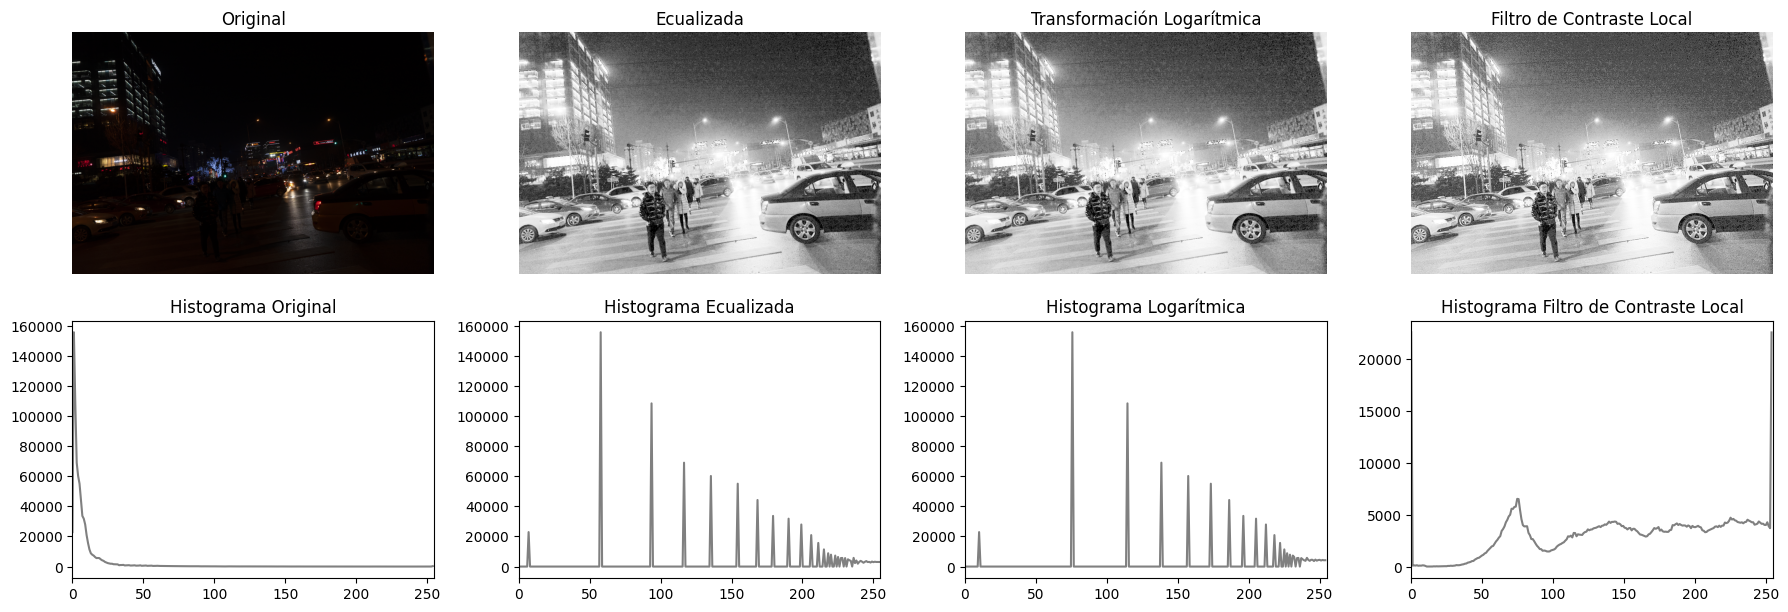

In [107]:
# Cargar la imagen
image = img_as_float(imread("1127.png"))

# Convertir a escala de grises
image_gray = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_BGR2GRAY)

# Histograma inicial
hist_original, bins_original = np.histogram(image_gray.flatten(), bins=256, range=[0, 255])

# 1. Aplicar ecualización del histograma
image_eq = equalize_hist(image_gray)
hist_eq, bins_eq = np.histogram((image_eq * 255).flatten(), bins=256, range=[0, 255])

# 2. Aplicar transformación logarítmica
image_log = adjust_log(image_eq, gain=1)
hist_log, bins_log = np.histogram((image_log * 255).flatten(), bins=256, range=[0, 255])

# 3. Aplicar filtro de contraste local (unsharp mask)
image_sharpened = unsharp_mask(image_log, radius=1, amount=1)
hist_sharpened, bins_sharpened = np.histogram((image_sharpened * 255).flatten(), bins=256, range=[0, 255])

# Mostrar los resultados
plt.figure(figsize=(18, 12))

# Imágenes
plt.subplot(4, 4, 1)
plt.title('Original')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(4, 4, 2)
plt.title('Ecualizada')
plt.imshow(image_eq, cmap='gray')
plt.axis('off')

plt.subplot(4, 4, 3)
plt.title('Transformación Logarítmica')
plt.imshow(image_log, cmap='gray')
plt.axis('off')

plt.subplot(4, 4, 4)
plt.title('Filtro de Contraste Local')
plt.imshow(image_sharpened, cmap='gray')
plt.axis('off')

# Histogramas
plt.subplot(4, 4, 5)
plt.title('Histograma Original')
plt.plot(bins_original[:-1], hist_original, color='gray')
plt.xlim(0, 255)

plt.subplot(4, 4, 6)
plt.title('Histograma Ecualizada')
plt.plot(bins_eq[:-1], hist_eq, color='gray')
plt.xlim(0, 255)

plt.subplot(4, 4, 7)
plt.title('Histograma Logarítmica')
plt.plot(bins_log[:-1], hist_log, color='gray')
plt.xlim(0, 255)

plt.subplot(4, 4, 8)
plt.title('Histograma Filtro de Contraste Local')
plt.plot(bins_sharpened[:-1], hist_sharpened, color='gray')
plt.xlim(0, 255)

plt.tight_layout()
plt.show()


<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Imagen 4.</span>




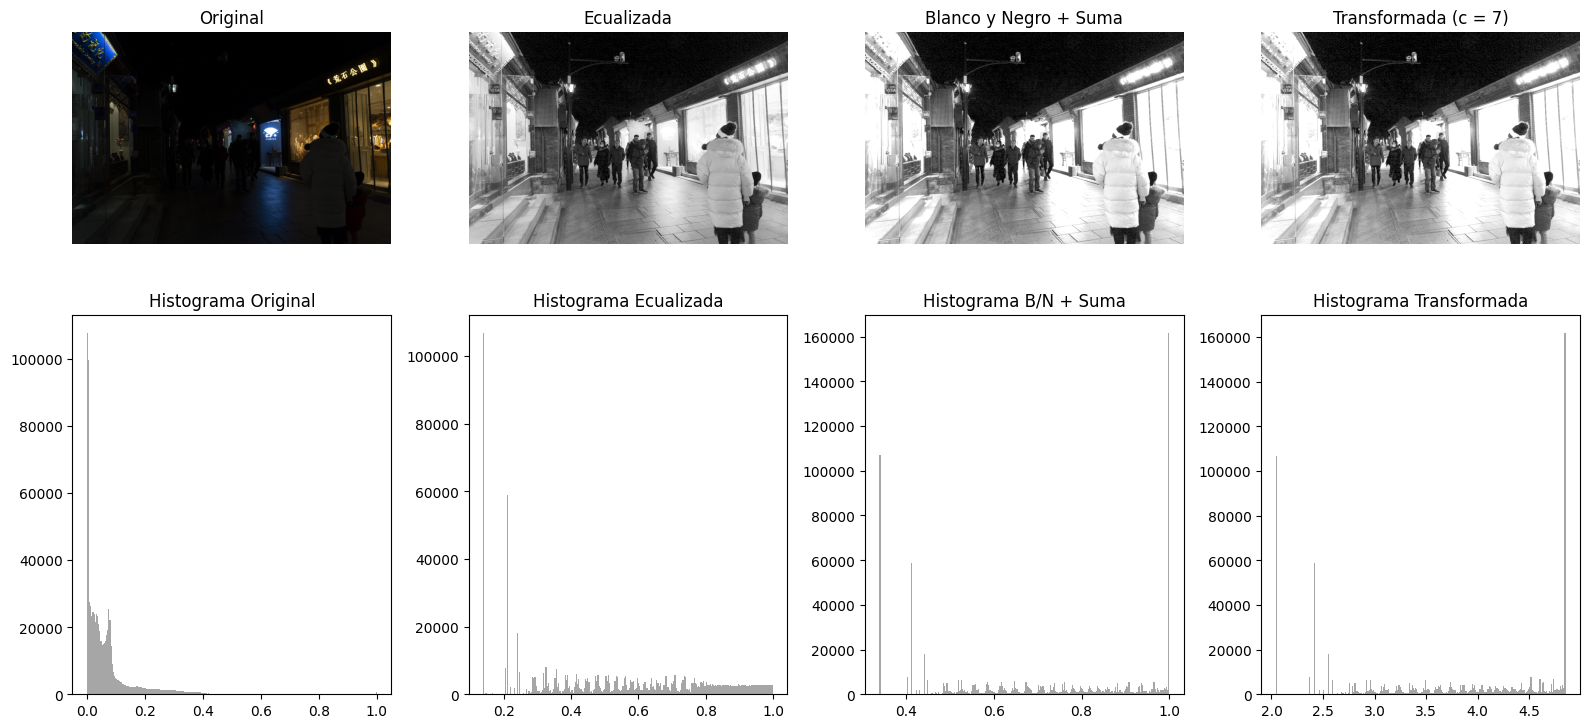

In [108]:
# Cargar la imagen
image = img_as_float(imread("1049.png"))

# Convertir la imagen original a escala de grises para el histograma
image_gray = rgb2gray(image)

# 1. Aplicar ecualización del histograma
image_eq = equalize_hist(image_gray)

# 2. Aplicar una operación de suma para aumentar el brillo
image_bright = np.clip(image_eq + 0.2, 0, 1)

# Definir la función de transformación logarítmica
def log_transform(image, c):
    return c * np.log1p(image)  # log1p es log(1 + x)

# Aplicar la transformación logarítmica con c = 7
image_log_transformed = log_transform(image_bright, 7)

# Mostrar las imágenes y sus histogramas
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Imagen original
axes[0, 0].set_title('Original')
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].axis('off')
axes[1, 0].hist(image_gray.ravel(), bins=256, color='gray', alpha=0.7)
axes[1, 0].set_title('Histograma Original')

# Imagen ecualizada
axes[0, 1].set_title('Ecualizada')
axes[0, 1].imshow(image_eq, cmap='gray')
axes[0, 1].axis('off')
axes[1, 1].hist(image_eq.ravel(), bins=256, color='gray', alpha=0.7)
axes[1, 1].set_title('Histograma Ecualizada')

# Imagen blanco y negro + suma
axes[0, 2].set_title('Blanco y Negro + Suma')
axes[0, 2].imshow(image_bright, cmap='gray')
axes[0, 2].axis('off')
axes[1, 2].hist(image_bright.ravel(), bins=256, color='gray', alpha=0.7)
axes[1, 2].set_title('Histograma B/N + Suma')

# Imagen transformada con c = 7
axes[0, 3].set_title('Transformada (c = 7)')
axes[0, 3].imshow(image_log_transformed, cmap='gray')
axes[0, 3].axis('off')
axes[1, 3].hist(image_log_transformed.ravel(), bins=256, color='gray', alpha=0.7)
axes[1, 3].set_title('Histograma Transformada')

plt.tight_layout()
plt.show()